In [1]:
# an implementation of value iteration to solve for the optimal policy
# for the gamblers problem that is described in 4.9
S = collect(0:100) # possible states
Ph = 0.4
θ = 1e-6
δ = 1

function value_iteration(V, π)
    k = 0
    while true
        Δ = 0
        for s = 1:99    # loop through the states
            v = V[s+1]   # old value
            A = collect(1:min(s, 100-s))
            q = zeros(length(A))
            for a in A
               q[a] =  Ph*(0 + δ*(V[s+1+a])) + (1 - Ph)*(0 + δ*(V[s+1-a]))
            end
            V[s+1], π[s+1] = findmax(q)
            Δ = max(Δ, abs(v - V[s+1]))
        end
        k += 1
        if Δ < θ
            break
        end
    end
    println(k, " iterations")
    return V, π
    # output the optimal value function and a deterministic policy
end

# the policy: how much to wager
pi = fill(0, length(S))
V = zeros(length(S))  # will hold the value function
V[101] = 1
V, pi = value_iteration(V, pi)


12 iterations


([0.0, 0.002065572744163598, 0.005164058667170925, 0.009225414495828551, 0.012910146667927311, 0.017385337235688764, 0.02306366304633331, 0.027814050785202285, 0.03227536666981828, 0.03768499817905139  …  0.821549050730805, 0.8348748468171712, 0.8519785343211755, 0.8720731550081634, 0.8844821702940684, 0.9009249080903027, 0.9232438930048981, 0.9405549448541816, 0.9643329669125089, 1.0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [2]:
print(pi)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 11, 10, 16, 8, 18, 6, 20, 4, 22, 2, 1, 25, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 14, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 50, 49, 2, 47, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 36, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 25, 1, 2, 3, 4, 5, 6, 18, 8, 9, 10, 11, 12, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

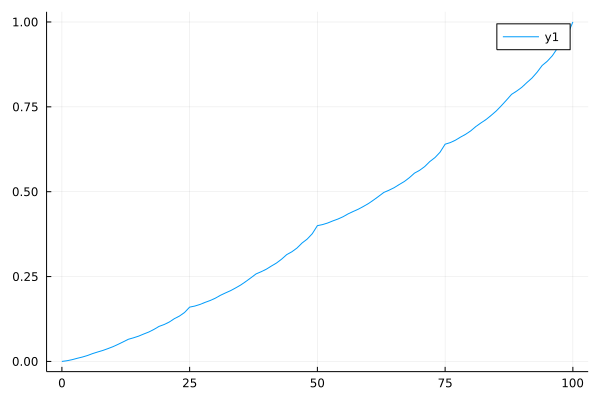

In [4]:
using Plots
plot(collect(0:100), V, fmt = :png)

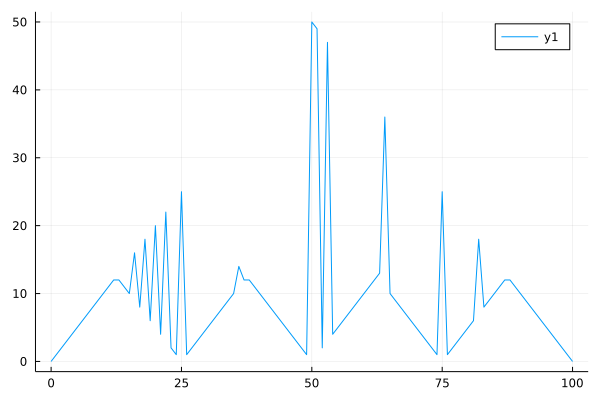

In [5]:
plot(collect(0:100), pi, fmt = :png)

In [6]:
## Explanation
# The policy generated shows the optimum amount to bet based on how much money the gambler has.
# There are multiple optimal equally optimal policies. The book's optimal policy gives π(51) = 1, but mine gives the 
# resul π(51) = 49. These are equally optimal policies because the value of states that the gambler could be in after 
# the bet times the probablility (Ph or 1-Ph) of being in each of these states depending on if they win or lose
# are equal.